In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import netCDF4 as nc
import warnings
import seaborn as sns

# Set style using seaborn
sns.set_style('dark')

warnings.filterwarnings("ignore")

In [7]:
# Specify Year
year = '2020'
fileloc = '../nc_dhw/'


# Variable
if fileloc == '../nc_dhw/': var = 'dhw'
else: var = 'analysed_sst'

In [8]:
# Load all data in ../csv_sst/
data_items = os.listdir(fileloc)

# Removeitems that don't have 'year' in them
data_items = [item for item in data_items if year in item]
print(len(data_items))

# Make labels, which should only be the date
labels = [item[5:10] for item in data_items]

# Create a pandas dataframe with three catagories: date, min, avg, max
df = pd.DataFrame(columns=['date', 'min', 'avg', 'max'])

366


In [9]:
# Cycle through all the data items
for data in data_items:
    # Load the file using netcdf4
    f = nc.Dataset(fileloc + data, 'r')
    
    # Extract SST Data ('analysed_sst') variable
    values = f.variables[var][:]
    # print(type(values))
    
    # Get minimum, average (Sum the non-nan values), and maximum values
    min_val = np.nanmin(values)
    avg_val = np.nanmean(values)
    max_val = np.nanmax(values)
    
    # If the var is 'analysed_sst', subtract 273.15 to convert to Celsius
    if var == 'analysed_sst':
        min_val -= 273.15
        avg_val -= 273.15
        max_val -= 273.15
    
    # Get the date
    date = data[5:10]
    
    # Create a dictionary
    new_row = pd.DataFrame([{'date': date, 'min': min_val, 'avg': avg_val, 'max': max_val}])
    df = pd.concat([df, new_row], ignore_index=True)

In [10]:
# Print the dataframe
print(df)

      date   min       avg   max
0    01-01  4.11  4.796575  5.18
1    01-02  3.98  4.651986  5.04
2    01-03  3.89  4.566164  4.95
3    01-04  3.78  4.440890  4.83
4    01-05  3.66  4.323424  4.71
..     ...   ...       ...   ...
361  12-27  5.70  6.116575  6.53
362  12-28  5.47  5.906644  6.31
363  12-29  5.30  5.759042  6.17
364  12-30  5.17  5.635000  6.05
365  12-31  4.95  5.418699  5.82

[366 rows x 4 columns]


Done


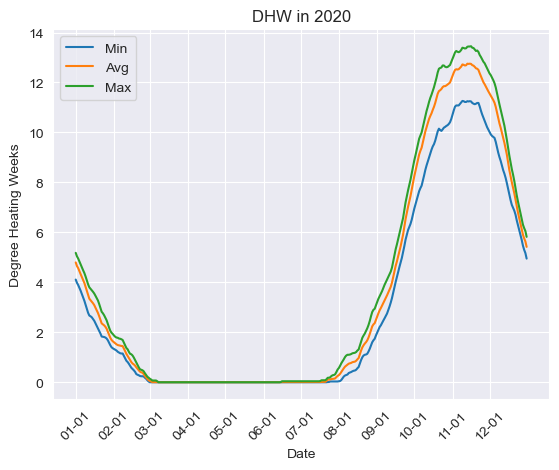

In [11]:
# Graph data, with date on x-axis and min, avg, max on y-axis
plt.plot(df['date'], df['min'], label='Min')
plt.plot(df['date'], df['avg'], label='Avg')
plt.plot(df['date'], df['max'], label='Max')

# Take "labels" and put them on the x-axis. Only show the first day of each month, specified by it containing "-01"
plt.xticks(df['date'][[date[-2:] == '01' for date in df['date']]], rotation=45)

plt.xlabel('Date')

# Label the y-axis
if var == 'dhw': plt.ylabel('Degree Heating Weeks')
else: plt.ylabel('SST (C)')

# Show the legend
plt.legend()
plt.grid()

# Set the title
if var == 'dhw': plt.title(f'DHW in {year}')
else: plt.title(f'SST in {year}')

print("Done")